In [1]:
import requests
import pandas as pd
import datetime as dt
import praw

In [2]:
reddit = praw.Reddit(client_id = 's46cB0O1CjDLeg',
                    client_secret = 'OnU58KhDJdZzqgdpaDLfsSQ723PG9w',
                    password = '?xkk5^H,Q_ZaF+m',
                    user_agent = 'Personal use for keyword analysis.',
                    username = 'crownds18')

In [3]:
subreddit = reddit.subreddit('Wallstreetbets')

In [4]:
wsb_subreddit = subreddit.top()

In [5]:
wsb_subreddit = subreddit.top(limit=100000)

In [6]:
for submission in subreddit.top(limit=100000):
    print(submission.title, submission.id)

Times Square right now l8rf4k
UPVOTE so everyone sees we got SUPPORT l6wu59
GME YOLO update — Jan 28 2021 l78uct
GME YOLO month-end update — Jan 2021 l846a1
It’s treason then l881ia
CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now l6x130
GME YOLO update — Feb 19 2021 lnqgz8
GME YOLO update — Jan 27 2021 --------------------------------------- guess i need 102 characters in title now l6ekdz
GME YOLO update — Feb 1 2021 lae6j0
Used some of my GME tendies to buy Nintendo Switches from Gamestop, then donated them to a Children's Hospital. Got featured on the local news and brought glory to WSB. l8c0u4
IT'S POWER TO THE TRADERS NOW l7feld
Wow super bowl commercial for us lexy8t
Can we all take a moment and appreciate the Mods who have grinded through t

In [7]:
topics_headers = { "title":[],
                "created": [], 
                "body":[]}

In [8]:
for submission in wsb_subreddit:
    topics_headers["title"].append(submission.title)
    topics_headers["created"].append(submission.created)
    topics_headers["body"].append(submission.selftext)

In [9]:
wsb_data = pd.DataFrame(topics_headers)

In [10]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [11]:
wsb_datetime = wsb_data["created"].apply(get_date)

In [12]:
wallstreetbets_data = wsb_data.assign(timestamp = wsb_datetime)

In [13]:
wallstreetbets_data

,title,created,body,timestamp
0,Times Square right now,1.612058e+09,,2021-01-30 19:00:38
1,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,,2021-01-28 14:40:34
2,GME YOLO update — Jan 28 2021,1.611897e+09,,2021-01-28 22:06:23
3,GME YOLO month-end update — Jan 2021,1.611983e+09,,2021-01-29 22:04:45
4,It’s treason then,1.611992e+09,,2021-01-30 00:40:59
5,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 14:49:11
6,GME YOLO update — Feb 19 2021,1.613798e+09,,2021-02-19 22:05:55
7,GME YOLO update — Jan 27 2021 ----------------...,1.611811e+09,,2021-01-27 22:15:35
8,GME YOLO update — Feb 1 2021,1.612242e+09,,2021-02-01 22:07:36
9,Used some of my GME tendies to buy Nintendo Sw...,1.612004e+09,,2021-01-30 03:53:40


In [14]:
wallstreetbets_data.set_index("timestamp")

,title,created,body
timestamp,,,
2021-01-30 19:00:38,Times Square right now,1.612058e+09,
2021-01-28 14:40:34,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2021-01-28 22:06:23,GME YOLO update — Jan 28 2021,1.611897e+09,
2021-01-29 22:04:45,GME YOLO month-end update — Jan 2021,1.611983e+09,
2021-01-30 00:40:59,It’s treason then,1.611992e+09,
2021-01-28 14:49:11,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...
2021-02-19 22:05:55,GME YOLO update — Feb 19 2021,1.613798e+09,
2021-01-27 22:15:35,GME YOLO update — Jan 27 2021 ----------------...,1.611811e+09,
2021-02-01 22:07:36,GME YOLO update — Feb 1 2021,1.612242e+09,


In [15]:

wallstreetbets_data['timestamp'] = pd.to_datetime(wallstreetbets_data['timestamp'], utc=True)

wallstreetbets_data.set_index('timestamp', inplace=True)

#wallstreetbets_data.index = wallstreetbets_data.index.date
#wallstreetbets_data.index = wallstreetbets_data.index.date

In [16]:
#wallstreetbets_data.index.dtype
wallstreetbets_data.index = wallstreetbets_data.index.date


In [17]:
wallstreetbets_data

,title,created,body
2021-01-30,Times Square right now,1.612058e+09,
2021-01-28,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2021-01-28,GME YOLO update — Jan 28 2021,1.611897e+09,
2021-01-29,GME YOLO month-end update — Jan 2021,1.611983e+09,
2021-01-30,It’s treason then,1.611992e+09,
2021-01-28,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...
2021-02-19,GME YOLO update — Feb 19 2021,1.613798e+09,
2021-01-27,GME YOLO update — Jan 27 2021 ----------------...,1.611811e+09,
2021-02-01,GME YOLO update — Feb 1 2021,1.612242e+09,
2021-01-30,Used some of my GME tendies to buy Nintendo Sw...,1.612004e+09,


In [18]:
wallstreetbets_data.drop(columns = ['created', 'body'], inplace = True)
wallstreetbets_data

,title
2021-01-30,Times Square right now
2021-01-28,UPVOTE so everyone sees we got SUPPORT
2021-01-28,GME YOLO update — Jan 28 2021
2021-01-29,GME YOLO month-end update — Jan 2021
2021-01-30,It’s treason then
2021-01-28,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...
2021-02-19,GME YOLO update — Feb 19 2021
2021-01-27,GME YOLO update — Jan 27 2021 ----------------...
2021-02-01,GME YOLO update — Feb 1 2021
2021-01-30,Used some of my GME tendies to buy Nintendo Sw...


In [19]:
wallstreetbets_data.to_csv('WallStreetBets.csv', index=False)

In [20]:
mylist = ['GME', 'GameStop', 'AMC']
pattern = '|'.join(mylist)

pattern
'GME | GameStop | AMC'

wallstreetbets_data['mentions'] = wallstreetbets_data.title.str.contains(pattern)
wallstreetbets_data
#print(dft.groupby('UID')['TRUTH'].sum().astype(int))
#wallstreetbets_data.(pattern)


,title,mentions
2021-01-30,Times Square right now,False
2021-01-28,UPVOTE so everyone sees we got SUPPORT,False
2021-01-28,GME YOLO update — Jan 28 2021,True
2021-01-29,GME YOLO month-end update — Jan 2021,True
2021-01-30,It’s treason then,False
2021-01-28,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,False
2021-02-19,GME YOLO update — Feb 19 2021,True
2021-01-27,GME YOLO update — Jan 27 2021 ----------------...,True
2021-02-01,GME YOLO update — Feb 1 2021,True
2021-01-30,Used some of my GME tendies to buy Nintendo Sw...,True


In [21]:
wallstreetbets_mentions = wallstreetbets_data.groupby(wallstreetbets_data.index)['mentions'].sum()
wallstreetbets_mentions

2017-01-31    0.0
2018-02-08    0.0
2018-03-14    0.0
2018-04-17    0.0
2018-06-03    0.0
2018-06-15    0.0
2018-07-18    0.0
2018-09-13    0.0
2018-09-28    0.0
2018-09-30    0.0
2018-12-07    0.0
2019-01-03    0.0
2019-01-11    0.0
2019-01-20    0.0
2019-02-11    0.0
2019-04-01    0.0
2019-06-29    0.0
2019-07-12    0.0
2019-08-12    0.0
2019-09-10    0.0
2019-09-16    0.0
2019-11-24    0.0
2020-01-07    0.0
2020-02-04    0.0
2020-02-06    0.0
2020-02-07    0.0
2020-02-08    0.0
2020-02-09    0.0
2020-02-19    0.0
2020-02-26    0.0
             ... 
2021-04-25    0.0
2021-04-26    1.0
2021-04-27    1.0
2021-04-29    0.0
2021-04-30    0.0
2021-05-02    0.0
2021-05-03    0.0
2021-05-05    0.0
2021-05-06    0.0
2021-05-07    0.0
2021-05-08    0.0
2021-05-10    1.0
2021-05-11    0.0
2021-05-12    0.0
2021-05-13    0.0
2021-05-17    0.0
2021-05-18    2.0
2021-05-20    0.0
2021-05-22    0.0
2021-05-24    0.0
2021-05-26    2.0
2021-05-27    0.0
2021-05-28    1.0
2021-05-29    0.0
2021-05-30

In [22]:
wallstreetbets_mentions.to_frame()

,mentions
2017-01-31,0.0
2018-02-08,0.0
2018-03-14,0.0
2018-04-17,0.0
2018-06-03,0.0
2018-06-15,0.0
2018-07-18,0.0
2018-09-13,0.0
2018-09-28,0.0
2018-09-30,0.0


In [23]:
wallstreetbets_mentions.index.isnull().sum()

0

In [24]:
wallstreetbets_mentions_plot = wallstreetbets_mentions
wallstreetbets_mentions_plot.index = pd.to_datetime(wallstreetbets_mentions_plot.index)
wallstreetbets_mentions_plot = wallstreetbets_mentions_plot.loc['2021-01-01':]

In [25]:
wallstreetbets_mentions_plot.index.dtype


dtype('<M8[ns]')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Stephan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\Stephan\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


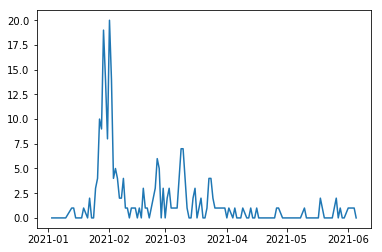

In [26]:
#.plot(rot=90).pd()
import matplotlib.pyplot as plt
plt.plot(wallstreetbets_mentions_plot[wallstreetbets_mentions_plot.index])
#.loc >= '2021-01-01'

In [27]:
wallstreetbets_mentions.to_csv('WallStreetBets.csv', index = False)

C:\Users\Stephan\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [29]:
wallstreetbets_mentions.head()

2017-01-31    0.0
2018-02-08    0.0
2018-03-14    0.0
2018-04-17    0.0
2018-06-03    0.0
Name: mentions, dtype: float64

In [30]:
wallstreetbets_mentions.to_pickle('wsb.pkl')